# <center>Práctica N°2: <br>Generación cuántica de números aleatorios</center>


### <br><center>Luisa Fernanda Gómez Buitrago<br>Luis Javier Zuluaga Betancur </center>


#### <br><center>Computación Cuántica 2022.1<br>Facultad de Ingeniería<br>Universidad de Antioquia</center>

## 1. **Marco Teórico: Representación de estados cuánticos**<br>
  1.1. A fin de realizar esta práctica de laboratorio, instale localmente en su computador de trabajo, la última versión de la plataforma **Qiskit**. Para ello siga las instrucciones indicadas en la siguiente página:  <br>
  <center>https://github.com/Qiskit/Qiskit</center> <br>

In [1]:
!pip install qiskit

 1.2. Verifique que su instalación del **Qiskit** fue correcta, ejecutando alguno de los ejercicios llevados a cabo en la **Práctica No. 1** de nuestro curso.  

In [9]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
import qiskit

qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state,0)
qc.draw()

┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

## 2. <b>Generación cuántica de números aleatorios</b><br>
  2.1. Luego de verificar su correcta instalación local de la plataforma **Qiskit**, descargue el programa encontrado en el siguiente enlace, y abra en su entorno de trabajo el código fuente descargado:  <br>
  <center><b>Teams de Computación Cuántica 2022.1: QRNG_Quantum Random</b> (https://surl.ms/Bjd) </center> <br>

In [ ]:
!pip install ibm-quantum-widgets

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor

token = 'ed185a8fb8ddaf48d5c19dc1014af69181847a37c6bc517fb70c3abf77e330ab2a003cd09fcd8bb608f30ee64cfe0e9e7502be1505f404cff9afe13f3ac73efd'
IBMQ.save_account(token,overwrite=True)    
my_provider = IBMQ.load_account()


In [3]:
# After loading credentials we query the backends
print(my_provider.backends())


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [4]:
my_min = 0
my_max = 100

In [6]:
backend = my_provider.get_backend("ibmq_qasm_simulator")

In [7]:
num_q = 24

q = QuantumRegister(num_q, 'q')
c = ClassicalRegister(num_q, 'c')

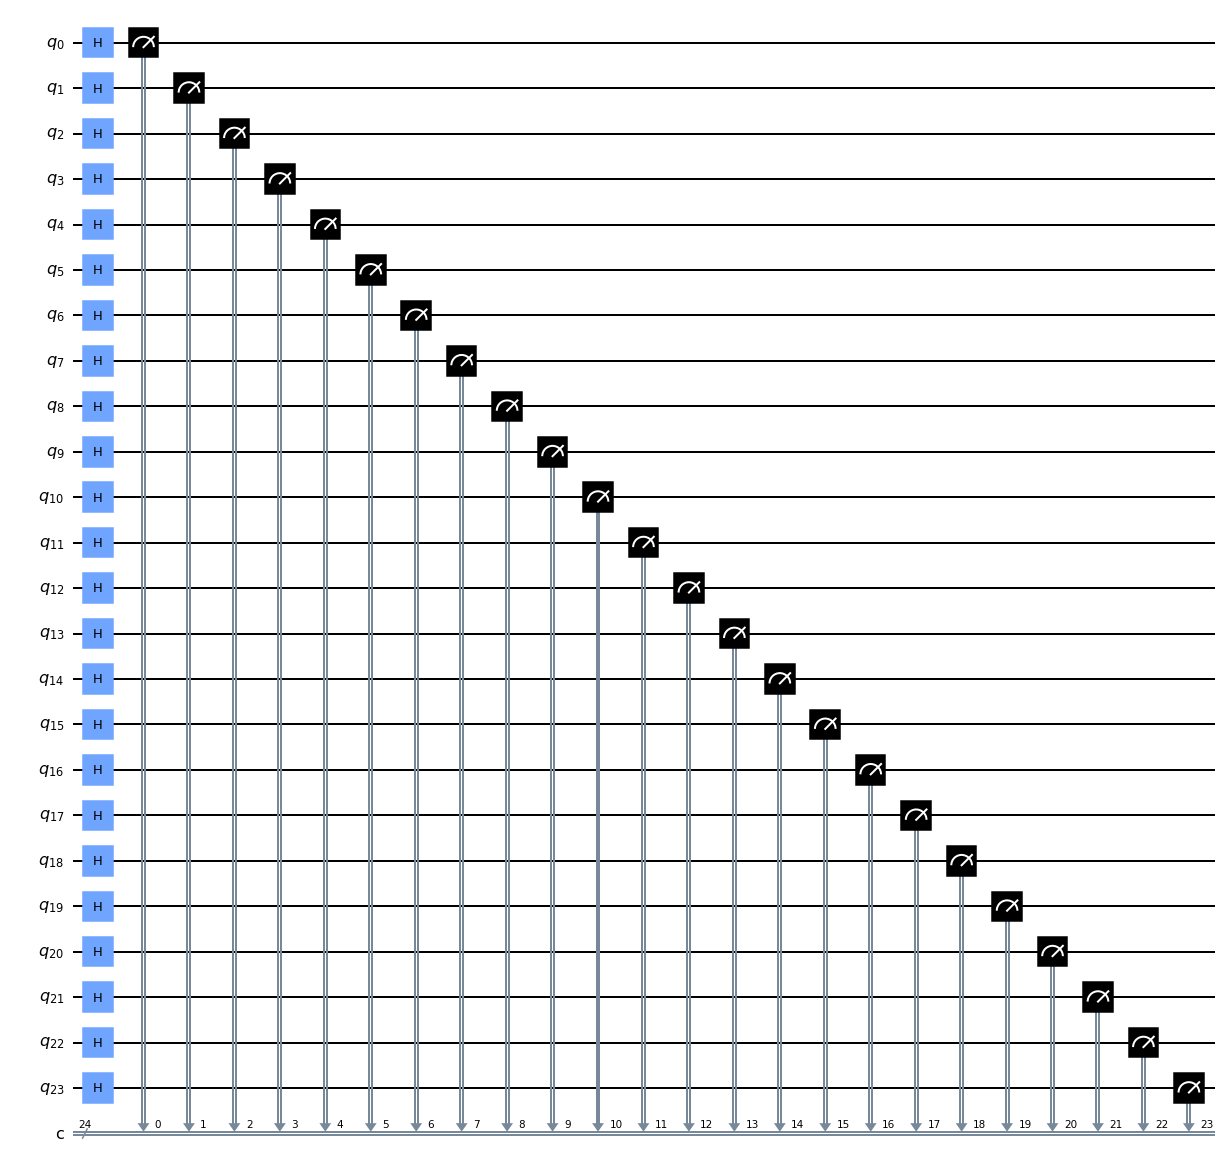

In [8]:
circuit = QuantumCircuit(q, c)
circuit.h(q)  # Applies hadamard gate to all qubits
circuit.measure(q, c)  # Measures all qubits


circuit.draw(output='mpl', style={'backgroundcolor': '#FFFFFF'})

In [9]:
job = execute(circuit, backend, shots=1)

print('Executing Job...\n')
job_monitor(job)

Executing Job...

Job Status: job has successfully run


In [10]:
counts = job.result().get_counts()
print('Counts: ', counts, '\n')

result = int(counts.most_frequent(), 2)
print('Result: ', result, '\n')

Counts:  {'101110010000100110001110': 1} 

Result:  12126606 



In [12]:
result1 = my_min + result % (my_max+1 - my_min)
print('The random number is: ', result1, '\n')

The random number is:  41 



In [13]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright